# Hindmarsh_Rose

In [12]:
import numpy as np
from brian2 import *

In [ ]:
start_scope()

In [13]:
# In the original model, time is measured in arbitrary time units
time_unit = 1*ms
defaultclock.dt = time_unit/10

In [14]:
x_1 = -1.6  # leftmost equilibrium point of the model without adaptation
a = 1; b = 3; c = 1; d = 5
r = 0.001; s = 4
eqs = Equations('''
dx/dt = (y - a*x**3 + b*x**2 + I - z)/time_unit : 1
dy/dt = (c - d*x**2 - y)/time_unit : 1
dz/dt = r*(s*(x - x_1) - z)/time_unit : 1
v = base + x * scale :1
I : 1 (constant)
base: 1 (constant)
scale: 1 (constant)
'''
)

In [15]:
# We run the model with three different currents
neuron = NeuronGroup(3, eqs, method='rk4')

In [20]:
# Set all variables to their equilibrium point
neuron.x = x_1
neuron.y = 'c - d*x**2'
neuron.z = 'r*(s*(x - x_1))'
neuron.scale = 1

In [21]:
# Set the constant current input
neuron.I = [0.4, 2, 4]

In [22]:
# Record the "membrane potential"
mon = StateMonitor(neuron, ['x', 'v', 'scale'], record=True)

In [23]:
run(2100*time_unit)

In [24]:
vvv = mon.v

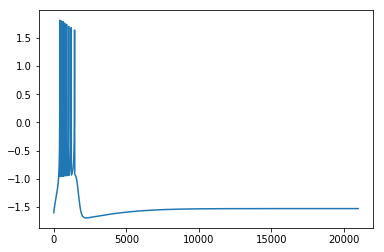

In [28]:
plot(vvv[0]);
# plot(mon.x[0]);
# plot(mon.scale[0])

In [ ]:
ax_top = plt.subplot2grid((2, 3), (0, 0), colspan=3)
ax_bottom_l = plt.subplot2grid((2, 3), (1, 0), colspan=2)
ax_bottom_r = plt.subplot2grid((2, 3), (1, 2))
for ax in [ax_top, ax_bottom_l, ax_bottom_r]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set(ylim=(-2, 2), yticks=[-2, 0, 2])

ax_top.plot(mon.t/time_unit, mon.x[0])

ax_bottom_l.plot(mon.t/time_unit, mon.x[1])
ax_bottom_l.set_xlim(700, 2100)

ax_bottom_r.plot(mon.t/time_unit, mon.x[2])
ax_bottom_r.set_xlim(1400, 2100)
ax_bottom_r.set_yticks([])

plt.show()